In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('Practice/5/1.txt', header=None)

In [3]:
df_1.columns = ['X', 'Y']

In [4]:
df_1

,X,Y
0,5.000000,10.500200
1,5.202020,13.998275
2,5.404040,9.682923
3,5.606061,9.575124
4,5.808081,7.764240
...,...,...
95,24.191919,53.244154
96,24.393939,58.451730
97,24.595960,62.766748
98,24.797980,54.131159


In [5]:
25 + 0.20202020202020243 * 3

25.60606060606061

In [12]:
def corr(df):
    # Вычисление среднего значения для переменной X
    mean_X = sum(df['X']) / len(df)
    
    # Вычисление среднего значения для переменной Y
    mean_Y = sum(df['Y']) / len(df)
    
    # Вычисление среднего произведения X и Y
    mean_XY = sum(df['X'] * df['Y']) / len(df)
    
    # Вычисление стандартного отклонения для переменной X
    Sx = np.sqrt(sum(df['X'] ** 2 - mean_X ** 2) / (len(df)))
    
    # Вычисление стандартного отклонения для переменной Y
    Sy = np.sqrt(sum(df['Y'] ** 2 - mean_Y ** 2) / (len(df)))
    
    # Вычисление коэффициента корреляции (Pearson)
    r = (mean_XY - mean_X * mean_Y) / (Sx * Sy)
    
    # Определение степени корреляции на основе абсолютного значения r
    chedock = ''
    if abs(r) > 0.9:
        chedock = 'Очень высокая'
    elif abs(r) > 0.7:
        chedock = 'Высокая'
    elif abs(r) > 0.5:
        chedock = 'Средняя'
    elif abs(r) > 0.3:
        chedock = 'Умеренная'
    elif abs(r) > 0.1:
        chedock = 'Слабая'
    
    # Возврат значения коэффициента корреляции и степени корреляции
    return r, chedock

In [15]:
def t_(r, n=len(df_1)):
    # Вычисление критерия t на основе коэффициента корреляции r и размера выборки n
    t_crit = abs(r) * np.sqrt((n - 2) / (1 - r ** 2))
    
    # Проверка значимости коэффициента корреляции
    if abs(t_crit) > scipy.stats.t.ppf(1 - 0.025, n - 2):
        # Возвращение сообщения, если коэффициент корреляции значительно отличается от нуля
        return 'Коэффициент корреляции значительно отличается от нуля ', f'{abs(t_crit)} > {scipy.stats.t.ppf(1 - 0.05 / 2, n - 2)}'

In [16]:
r, _ = corr(df_1)
print('Коэффициент корреляции = ', r)

print('Уровень корреляции по шкале Чедокка = ', corr(df_1)[1])
print(t_(r))

Коэффициент корреляции =  0.983747835628188
Уровень корреляции по шкале Чедокка =  Очень высокая
('Коэффициент корреляции значительно отличается от нуля ', '54.23729126263902 > 1.984467454426692')


In [17]:
def a_b(df):
    stdx = np.std(df['X'])
    stdy = np.std(df['Y'])
    mean_X = sum(df['X']) / len(df)
    mean_Y = sum(df['Y']) / len(df)
    # Вычисление коэффициента наклона (a) и коэффициента сдвига (b) для линейной регрессии
    a = r * stdy / stdx
    b = mean_Y - a * mean_X
    # Возвращение коэффициентов a и b
    return a, b

In [19]:
print('Наклон =', a_b(df_1)[0], 'Сдвиг =', a_b(df_1)[1])

Наклон = 2.40756036127594 Сдвиг = -2.343587204139361


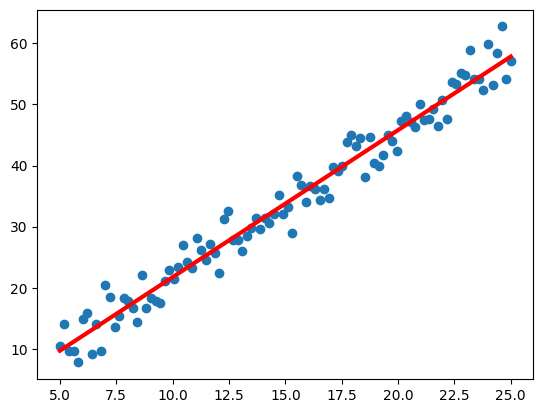

In [21]:
plt.scatter(df_1['X'], df_1['Y'])
# Создание линейной регрессии на основе коэффициентов a и b, рассчитанных функцией a_b
plt.plot(df_1['X'], df_1['X'] * a_b(df_1)[0] + a_b(df_1)[1], c='r', linewidth=3)
plt.show()

In [22]:
y_pred = df_1['X'] * a_b(df_1)[0] + a_b(df_1)[1]

In [23]:
def adequacy(df):
    # Вычисление среднего значения для переменной Y
    mean_Y = sum(df['Y']) / len(df)
    
    # Вычисление суммы квадратов отклонений переменной Y от среднего
    S1 = sum((df['Y'] - mean_Y) ** 2) / (len(df) - 1)
    
    # Вычисление суммы квадратов отклонений переменной Y от предсказанных значений (y_pred)
    # (Необходимо предварительно определить y_pred в вашем коде)
    S2 = sum((df['Y'] - y_pred) ** 2) / (len(df) - len(list(df.columns)) + 1)
    
    # Выбор максимальной и минимальной суммы квадратов для дальнейших вычислений
    Sb = max(S1, S2)
    Sm = min(S1, S2)
    
    # Вычисление статистики F для теста адекватности модели
    F = Sb / Sm
    
    # Проверка адекватности модели
    if F > scipy.stats.f.ppf(0.05, (len(df) - 2), (len(df) - 1)):
        return 'Модель адекватна', f'{F} > {scipy.stats.f.ppf(0.05, (len(df) - 2), (len(df) - 1))}'

In [24]:
adequacy(df_1)

('Модель адекватна', '31.017181260284897 > 0.7165989462583365')

In [25]:
a, b = a_b(df_1)

In [28]:
def a_b_significancy(a, b, df):
    # Вычисление стандартного отклонения модели
    Smod = np.sqrt(sum((df['Y'] - y_pred) ** 2) / (len(df) - len(list(df.columns))))
    
    # Вычисление стандартной ошибки коэффициента наклона (ma) и коэффициента сдвига (mb)
    ma = Smod / (np.std(df['X']) * np.sqrt(len(df)))
    mb = Smod * np.sqrt(sum(df['X'] ** 2)) / (np.std(df['X']) * len(df))
    
    # Вычисление t-статистики для коэффициентов наклона и сдвига
    Ta = a / ma
    Tb = b / mb
    
    # Вычисление доверительных интервалов для коэффициентов
    interval_a_left = a - scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2) * ma
    interval_a_right = a + scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2) * ma
    interval_b_left = b - scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2) * mb
    interval_b_right = b + scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2) * mb
    
    # Проверка значимости коэффициентов и вывод результатов
    if abs(Ta) > scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2):
        if abs(Tb) > scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2):
            print(f'{interval_a_left.round(3)} < a < {interval_a_right.round(3)}', '\n',
                  f'{interval_b_left.round(3)} < b < {interval_b_right.round(3)}')
            return interval_a_left, interval_b_left, interval_a_right, interval_b_right, f'Коэффициент наклона значим, Коэффициент сдвига значим; Наклон: {abs(Ta)} > {scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2)}, Сдвиг: {abs(Tb)} > {scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2)}'
        else:
            print(f'{interval_a_left.round(3)} < a < {interval_a_right.round(3)}', '\n',
                  f'{interval_b_left.round(3)} < b < {interval_b_right.round(3)}')
            return interval_a_left, interval_b_left, interval_a_right, interval_b_right, f'Коэффициент наклона значим, Коэффициент сдвига незначим; Наклон: {abs(Ta)} > {scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2)}, Сдвиг: {abs(Tb)} < {scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2)}'
    else:
        print(f'{interval_a_left.round(3)} < a < {interval_a_right.round(3)}', '\n',
              f'{interval_b_left.round(3)} < b < {interval_b_right.round(3)}')
        return f'Коэффициенты незначимы; Наклон: {abs(Ta)} < {scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2)}, Сдвиг: {abs(Tb)} < {scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2)}'

In [29]:
a_b_significancy(a, b, df_1)[4]

2.319 < a < 2.496 
 -3.761 < b < -0.926


'Коэффициент наклона значим, Коэффициент сдвига значим; Наклон: 54.237291262635274 > 1.984467454426692, Сдвиг: 3.2805480079769147 > 1.984467454426692'

In [30]:
a_left, b_left, _, _, _ = a_b_significancy(a, b, df_1)
_, _, a_right, b_right, _ = a_b_significancy(a, b, df_1)

2.319 < a < 2.496 
 -3.761 < b < -0.926
2.319 < a < 2.496 
 -3.761 < b < -0.926


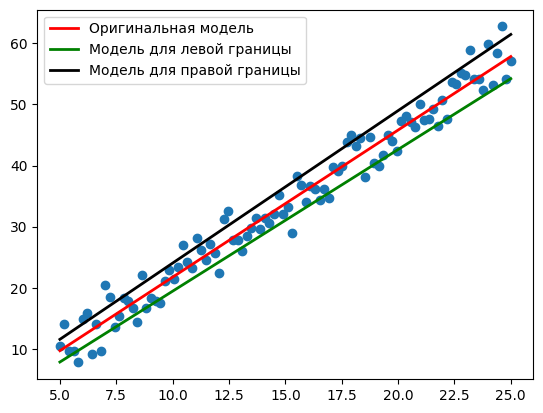

In [32]:
plt.scatter(df_1['X'], df_1['Y'])
plt.plot(df_1['X'], df_1['X'] * a_b(df_1)[0] + a_b(df_1)[1], c='r', linewidth=2, label='Оригинальная модель')
plt.plot(df_1['X'], df_1['X'] * a_left + b_left, c='g', linewidth=2, label='Модель для левой границы')
plt.plot(df_1['X'], df_1['X'] * a_right + b_right, c='black', linewidth=2, label='Модель для правой границы')
plt.legend()
plt.show()

In [33]:
def pred_significancy(df):
    # Вычисление среднего значения для переменной X
    mean_X = sum(df['X']) / len(df)
    
    # Вычисление стандартного отклонения модели
    Smod = np.sqrt(sum((df['Y'] - y_pred) ** 2) / (len(df) - len(list(df.columns)) + 1))
    
    # Вычисление E (предельная ошибка) для доверительного интервала прогнозов
    E = scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2) * Smod * np.sqrt(
        1 + (1 / len(df)) + ((25.6060 - mean_X) ** 2) / (len(df) * np.var(df['X'])))
    
    # Возвращение значения E
    return E

In [34]:
E = pred_significancy(df_1)

In [ ]:
y_pred_1 = 25.6060 * a_b(df_1)[0] + a_b(df_1)[1]
y_pred_1
print(
    f'Доверительный интервал для предсказания {(y_pred_1 - E).round(3)} < {y_pred_1.round(3)} < {(y_pred_1 + E).round(3)}')

Доверительный интервал для предсказания 56.854 < 61.028 < 65.201


In [ ]:
df_2 = pd.read_csv("2.txt", header=None)

In [ ]:
df_2.columns = ['X', 'fac_1', 'fac_2', 'Y']

In [ ]:
df_2

,X,fac_1,fac_2,Y
0,14.696970,1.0,0.0,43.219656
1,16.313131,0.0,1.0,-49.719975
2,10.050505,0.0,1.0,-20.704565
3,22.171717,0.0,0.0,-63.893540
4,21.363636,0.0,1.0,-58.570599
...,...,...,...,...
195,12.676768,0.0,0.0,-34.934245
196,24.797980,0.0,0.0,-65.536777
197,11.262626,0.0,0.0,-31.974198
198,7.222222,1.0,1.0,19.691893


In [ ]:
def RSS_(a, b, df):
    RSS = sum((df['Y'] - (df['X'] * a + b)) ** 2)
    return RSS

In [ ]:
def F_statistic(RSS1, RSS2, RSS, k=len(list(df_2.columns)), n=len(df_2)):
    F_stat = ((RSS - RSS1 - RSS2) / k) / ((RSS1 + RSS2) / (n - 2 * k))
    if F_stat > scipy.stats.f.ppf(0.05, k, n - 2 * k):
        return 'Деление по номинальному признаку имеет смысл', f'{F_stat} > {(scipy.stats.f.ppf(0.05, k, n - 2 * k))}'
    else:
        return 'Деление по номинальному признаку не имеет смысл', f'{F_stat} < {(scipy.stats.f.ppf(0.05, k, n - 2 * k))}'

In [ ]:
def testYo(df, fac):
    df_0 = df[df[fac] == 0]
    df_1 = df[df[fac] == 1]
    a1, b1 = a_b(df_1)
    a2, b2 = a_b(df_0)
    a3, b3 = a_b(df)
    fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
    ax1.scatter(df_1['X'], df_1['Y'], label='номинальный признак равен = 1')
    ax1.plot(df_1['X'], df_1['X'] * a1 + b1, c='r', linewidth=2)
    ax1.set_title('d = 1, фактор 2')
    ax2.scatter(df_0['X'], df_0['Y'], label='номинальный признак равен = 0')
    ax2.plot(df_0['X'], df_0['X'] * a2 + b2, c='r', linewidth=2)
    ax2.set_title('d = 0, фактор 2')
    RSS1 = RSS_(a1, b1, df_1)
    RSS2 = RSS_(a2, b2, df_0)
    RSS = RSS_(a3, b3, df)
    return F_statistic(RSS1, RSS2, RSS)

('Деление по номинальному признаку имеет смысл',
 '11979.644890532769 > 0.17708865295635726')

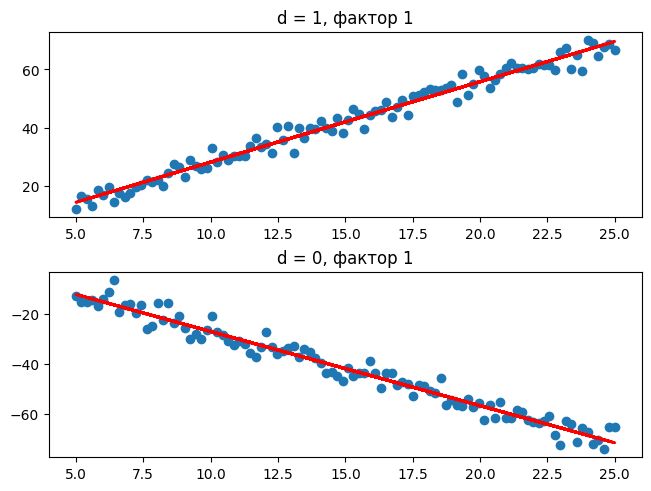

In [ ]:
testYo(df_2, 'fac_1')

('Деление по номинальному признаку имеет смысл',
 '0.29921850421090757 > 0.17708865295635726')

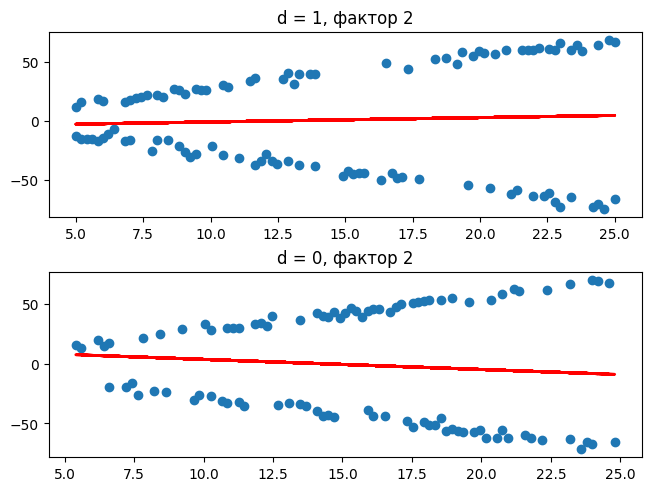

In [ ]:
testYo(df_2, 'fac_2')

In [ ]:
df_3 = pd.read_csv('3.txt', header=None)

In [ ]:
df_3

,0,1
0,5.000000,-9.728741
1,5.202020,7.876039
2,5.404040,32.660025
3,5.606061,26.919894
4,5.808081,30.549096
...,...,...
95,24.191919,123.997763
96,24.393939,147.247352
97,24.595960,188.833767
98,24.797980,77.288800


In [ ]:
df_3.columns = ['X', 'Y']

In [ ]:
a1, b1 = a_b(df_3)

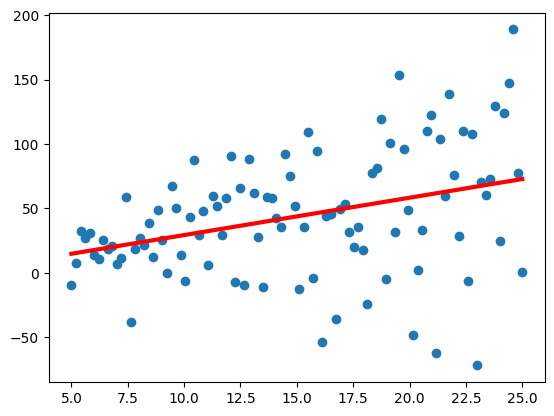

In [ ]:
plt.scatter(df_3['X'], df_3['Y'])
plt.plot(df_3['X'], df_3['X'] * a1 + b1, c='r', linewidth=3)
plt.show()

In [ ]:
a_b_significancy(a1, b1, df_3)

1.32<a<4.482 
 -25.193<b<25.683


(1.320265806813134,
 -25.193248694641582,
 4.48154799159353,
 25.683434629803656,
 'Коэффициент slope значим, Коэффициент intercept незначим; slope: 3.6420382574551904 > 1.984467454426692, intercept: 0.019119918425961117 < 1.984467454426692')

In [ ]:
df_3['y_pred'] = df_3['X'] * a1 + b1

In [ ]:
adequacy(df_3)

('Модель адекватна', '1.0911031554124486 > 0.7165989462583362')

In [ ]:
X = pd.DataFrame(np.sort(df_3['X']))

In [ ]:
X.reset_index(inplace=True)

In [ ]:
X.columns = ['rank_X', 'X']

In [ ]:
df_3['e'] = pd.DataFrame(abs(df_3['Y'] - df_3['y_pred']))

In [ ]:
E = pd.DataFrame(np.sort(df_3['e']))
E.reset_index(inplace=True)
E.columns = ['rank_e', 'e']

In [ ]:
df_new = df_3.merge(E, on="e", how="left")

In [ ]:
df_new_ = df_new.merge(X, on='X', how='left')

In [ ]:
df_new_

,X,Y,y_pred,e,rank_e,rank_X
0,5.000000,-9.728741,14.749627,24.478368,48,0
1,5.202020,7.876039,15.335669,7.459630,21,1
2,5.404040,32.660025,15.921711,16.738314,38,2
3,5.606061,26.919894,16.507753,10.412141,27,3
4,5.808081,30.549096,17.093795,13.455301,32,4
...,...,...,...,...,...,...
95,24.191919,123.997763,70.423598,53.574165,77,95
96,24.393939,147.247352,71.009640,76.237712,91,96
97,24.595960,188.833767,71.595682,117.238086,97,97
98,24.797980,77.288800,72.181724,5.107076,17,98


In [ ]:
def sperma(df):
    rs = 1 - ((6 * sum((df['rank_e'] - df['rank_X']) ** 2)) / (len(df) * (len(df) ** 2 - 1)))
    ts = rs * np.sqrt(len(df) - 2) / (np.sqrt(1 - rs ** 2))
    if ts > scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2):
        return 'Гетеро', f'{ts.round(3)} > {(scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2)).round(3)}'
    else:
        return 'Гомо', f'{ts.round(3)} < {(scipy.stats.t.ppf(1 - 0.05 / 2, len(df) - 2)).round(3)}'

In [ ]:
sperma(df_new_)

('Гетеро', '4.647 > 1.984')

In [ ]:
df_3.sort_values(ascending=False, by="X", ignore_index=True, inplace=True)

In [ ]:
m1 = df_3.loc[0:3 / 8 * len(df_3):, ]
m2 = df_3.loc[len(df_3) - 3 / 8 * len(df_3):len(df_3), ]

In [ ]:
m1

,X,Y,y_pred,e
0,25.000000,0.331944,72.767765,72.435821
1,24.797980,77.288800,72.181724,5.107076
2,24.595960,188.833767,71.595682,117.238086
3,24.393939,147.247352,71.009640,76.237712
4,24.191919,123.997763,70.423598,53.574165
5,23.989899,24.932372,69.837556,44.905184
6,23.787879,129.687976,69.251515,60.436461
7,23.585859,72.975474,68.665473,4.310001
8,23.383838,60.577545,68.079431,7.501886
9,23.181818,70.108338,67.493389,2.614949


In [ ]:
m2

,X,Y,y_pred,e
63,12.272727,-7.262827,35.847132,43.109959
64,12.070707,90.730954,35.261090,55.469864
65,11.868687,57.676719,34.675049,23.001670
66,11.666667,29.125025,34.089007,4.963982
67,11.464646,51.883622,33.502965,18.380657
68,11.262626,59.650585,32.916923,26.733662
69,11.060606,5.851166,32.330881,26.479716
70,10.858586,47.795748,31.744840,16.050908
71,10.656566,28.993237,31.158798,2.165560
72,10.454545,87.281309,30.572756,56.708553


In [ ]:
def hagi_wagi(m1, m2):
    F = (sum((m1['y_pred'] - m1['Y']) ** 2) / (len(m1) - 1)) / (sum((m2['y_pred'] - m2['Y']) ** 2) / (len(m2) - 1))
    if F > scipy.stats.f.ppf(0.95, len(m1) - 1, len(m2) - 1):
        return 'Гетеро', f'{round(F, 3)} > {(scipy.stats.f.ppf(0.95, len(m1) - 1, len(m2) - 1)).round(3)}'
    else:
        return 'Гомо', f'{round(F, 3)} < {(scipy.stats.f.ppf(0.95, len(m1) - 1, len(m2) - 1)).round(3)}'

In [ ]:
hagi_wagi(m1, m2)

('Гетеро', '5.928 > 1.738')